# Transfer entropy exploration

In [1]:
import numpy as np
import xarray as xr

from tqdm.notebook import tqdm

from frites.conn import conn_te
from cfutils import set_mpl_style

from matplotlib import pyplot as plt
set_mpl_style()

np.random.seed(0)

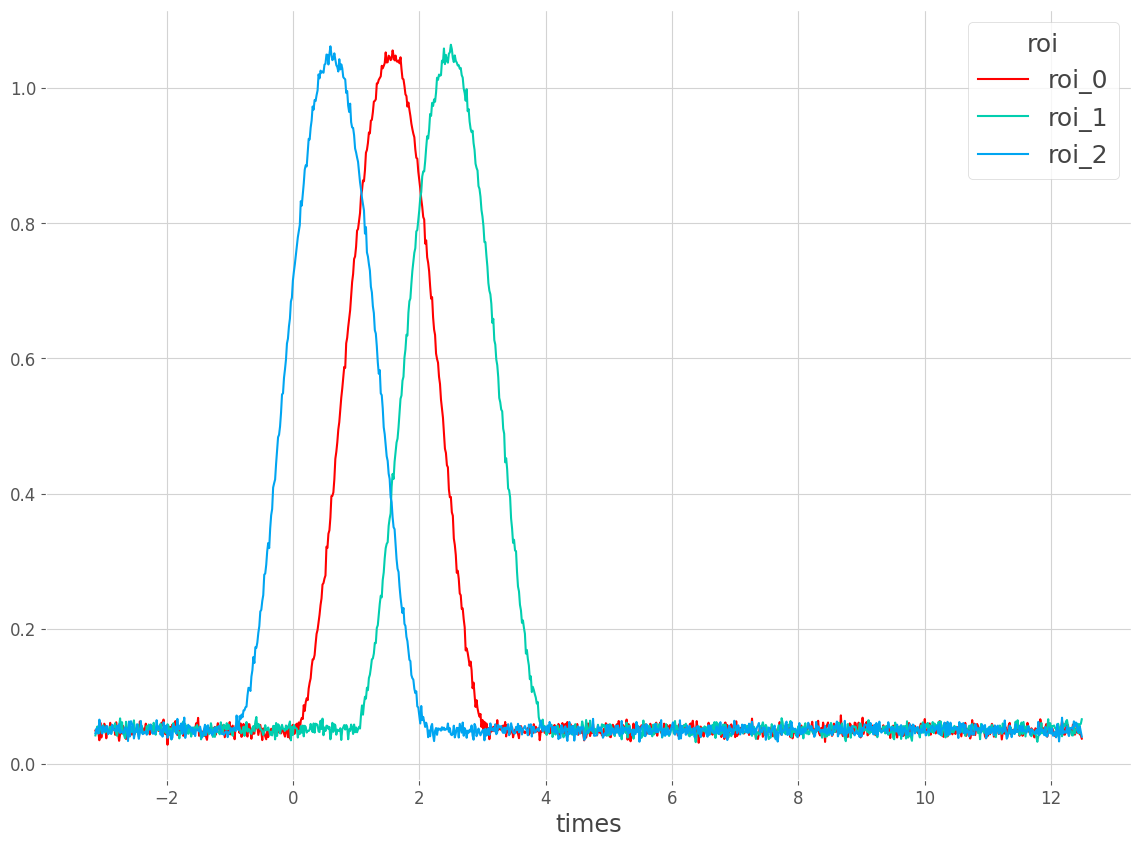

In [11]:
n_trials=20
n_roi=3
n_times=1000
ref=200
bump_len=200

trials=np.arange(n_trials)
roi=[f"roi_{k}" for k in range(n_roi)]
times = (np.arange(n_times) - ref) / 64.0

x=0.1*np.random.rand(n_trials, n_roi, n_times)
bump=np.hanning(bump_len).reshape(1,-1)

lags={1:60, 2:-60}
x[:, 0, ref:ref + bump_len] += bump
for t, lag in lags.items():
    x[:, t, ref+lag:ref+lag+bump_len]+=bump

x=xr.DataArray(x, dims=('trials','roi','times'), coords=(trials, roi, times))

x.mean('trials').plot(x='times', hue='roi')
plt.show()

In [35]:
min_delay,max_delay,step_delay=0,100,1
te=conn_te(x,times='times', roi='roi', n_jobs=-1, min_delay=min_delay,
           max_delay=max_delay, step_delay=step_delay)

# te_mean=te.mean('trials')
# lags=te['times'].data[np.where(te_mean == te_mean.max('times'))[1]]

Defining links (n_roi=3; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=6, delays=[0:1:100])
100%|██████████| Estimating TE : 6/6 [00:00<00:00, 3058.93it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


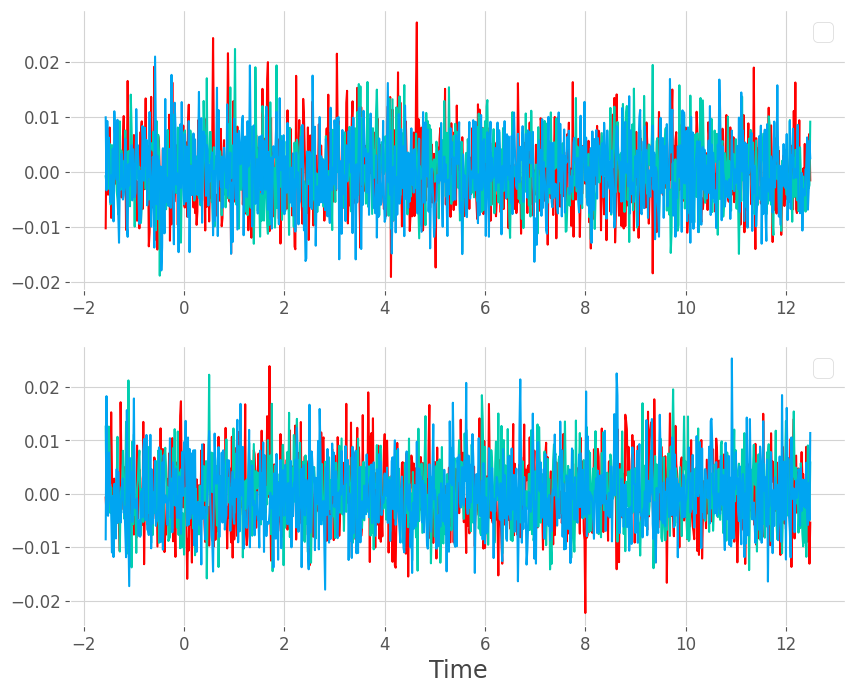

In [36]:
roi_p=te['roi'].data

plt.figure(figsize=(10, 8))
plt.subplot(211)
for r in roi_p:
    if r.startswith('roi_0') or (r.startswith('roi_1') and r.endswith('roi_2')): 
        plt.plot(te.times.data, te.sel(roi=r).T)
plt.legend()
plt.subplot(212)
for r in roi_p:
    if r.startswith('roi_2') or (r.startswith('roi_1') and r.endswith('roi_0')):
        plt.plot(te.times.data, te.sel(roi=r).T)
plt.legend()
plt.xlabel('Time')
plt.show()